In [1]:
import pandas as pd
from sodapy import Socrata

In [4]:
def download_dataset(domain, dataset_id):
    # for this exercise, we're not using an app token,
    # but you *should* sign-up and register for an app_token if you want to use the Socrata API
    client = Socrata(domain, app_token=None)
    offset = None
    data = []
    batch_size = 1000

    while True:
        records = client.get(dataset_id, offset=offset, limit=batch_size)
        data.extend(records)
        if len(records) < batch_size:
            break
        offset = offset + batch_size if (offset) else batch_size

    return pd.DataFrame.from_dict(data)

def download_permits_dataset():
    return seattle_permits_df if "seattle_permits_df" in globals() else download_dataset("data.seattle.gov", "76t5-zqzr")

# load Seattle permits data
seattle_permits_df = download_permits_dataset()

In [5]:
print(len(seattle_permits_df))
seattle_permits_df.head(10)

142845


,permitnum,permitclass,permitclassmapped,permittype,permittypedesc,description,housingunits,housingunitsremoved,housingunitsadded,estprojectcost,...,:@computed_region_ru88_fbhk,:@computed_region_kuhn_3gp2,:@computed_region_q256_3sug,issueddate,expiresdate,applieddate,completeddate,:@computed_region_2day_rhn5,:@computed_region_cyqu_gs94,contractorcompanyname
0,6812160-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Remodel and addition to existing single family...,1,0,0,125000,...,37,50,19581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6812603-RR,Multifamily,Residential,Roof,NaN,The Cabana/Community Building at Park Point Co...,NaN,NaN,NaN,25000,...,55,48,18792,2020-11-30,2022-05-30,NaN,NaN,NaN,NaN,NaN
2,6766464-DM,Commercial,Non-Residential,Demolition,Demolition,"Demolition of existing commercial building, pe...",NaN,NaN,NaN,500000,...,14,24,18081,NaN,NaN,2020-05-06,NaN,NaN,NaN,NaN
3,6810504-CN,N/A,N/A,Building,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6616372-CN,Single Family/Duplex,Residential,Building,Addition/Alteration,Addition and alteration to existing single fam...,NaN,NaN,NaN,11600,...,50,39,19575,2017-09-01,2019-03-01,2017-09-01,2018-05-17,NaN,NaN,NaN
5,6271172-CN,Commercial,Non-Residential,Building,Addition/Alteration,750' expansion of existing outdoor seating area.,NaN,NaN,NaN,NaN,...,56,10,18390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6744197-CN,Institutional,Non-Residential,Building,Addition/Alteration,Substantial alterations throughout existing li...,0,0,0,20056237,...,46,34,18377,NaN,NaN,2020-09-03,NaN,NaN,NaN,NaN
7,6803586-DM,Single Family/Duplex,Residential,Demolition,Demolition,"Demo existing single family residence, per plan.",NaN,NaN,NaN,35000,...,52,46,18230,NaN,NaN,2020-11-06,NaN,NaN,NaN,NaN
8,6805433-RR,Single Family/Duplex,Residential,Roof,NaN,Remove existing Composition Shingles and insta...,NaN,NaN,NaN,18894,...,53,47,18792,2020-10-14,2022-04-14,NaN,NaN,NaN,NaN,NaN
9,6814283-CN,Multifamily,Residential,Building,Addition/Alteration,Replace in kind 2 beams on a multi-familiy bui...,NaN,NaN,NaN,50000,...,6,32,19582,2020-12-11,2022-06-11,2020-12-10,NaN,125,1,NaN


In [6]:
seattle_permits_df["applieddate"].value_counts(dropna=False).head(10)

NaN           17783
2005-11-17      121
2016-06-17      117
2016-06-23       95
2013-12-23       85
2018-01-17       81
2015-04-16       81
2013-11-15       80
2006-08-02       79
2015-11-24       79
Name: applieddate, dtype: int64

In [7]:
seattle_permits_df = seattle_permits_df[seattle_permits_df["applieddate"].notnull()]
seattle_permits_df = seattle_permits_df[["applieddate"]].reset_index(drop=True)
seattle_permits_df.head(10)

,applieddate
0,2020-05-06
1,2017-09-01
2,2020-09-03
3,2020-11-06
4,2020-12-10
5,2020-08-28
6,2020-10-09
7,2020-09-17
8,2019-07-02
9,2019-05-21


In [8]:
import datetime

fixed_dates_df = seattle_permits_df.copy()
fixed_dates_df["applieddate"] = fixed_dates_df["applieddate"].apply(pd.to_datetime)


In [9]:
fixed_dates_df.head(10)

,applieddate
0,2020-05-06
1,2017-09-01
2,2020-09-03
3,2020-11-06
4,2020-12-10
5,2020-08-28
6,2020-10-09
7,2020-09-17
8,2019-07-02
9,2019-05-21


In [10]:
fixed_dates_df = fixed_dates_df.set_index(fixed_dates_df["applieddate"])


In [11]:
fixed_dates_df.head(10)

,applieddate
applieddate,
2020-05-06,2020-05-06
2017-09-01,2017-09-01
2020-09-03,2020-09-03
2020-11-06,2020-11-06
2020-12-10,2020-12-10
2020-08-28,2020-08-28
2020-10-09,2020-10-09
2020-09-17,2020-09-17
2019-07-02,2019-07-02


In [12]:
grouped = fixed_dates_df.resample("M").count()

In [13]:
grouped

,applieddate
applieddate,
1986-04-30,1
1986-05-31,0
1986-06-30,0
1986-07-31,0
1986-08-31,0
...,...
2020-08-31,642
2020-09-30,651
2020-10-31,633


In [14]:
data_df = pd.DataFrame({"count": grouped.values.flatten()}, index=grouped.index)
data_df.head(10)

,count
applieddate,
1986-04-30,1
1986-05-31,0
1986-06-30,0
1986-07-31,0
1986-08-31,0
1986-09-30,0
1986-10-31,0
1986-11-30,0
1986-12-31,0


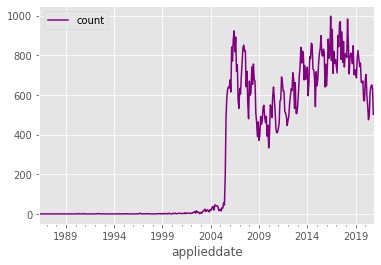

In [15]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

data_df.plot(color="purple")

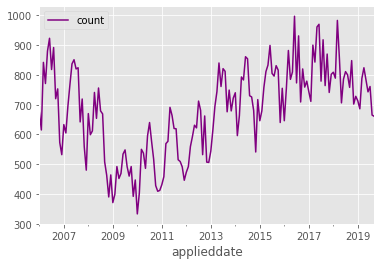

In [16]:
def is_between_2006_and_now(date):
    return date > datetime.datetime(2006, 1, 1) and date < datetime.datetime(2019, 10, 1)

data_df = data_df[data_df.index.to_series().apply(is_between_2006_and_now)]
data_df.plot(color="purple")

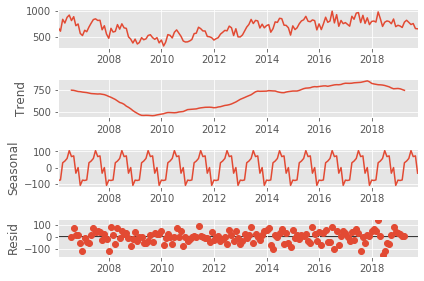

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_df)
fig = result.plot()

In [18]:
from fbprophet import Prophet
model = Prophet()
train_df = data_df.rename(columns={"count":'y'})
train_df["ds"] = train_df.index
model.fit(train_df)

ModuleNotFoundError: No module named 'fbprophet'

In [19]:
pd.plotting.register_matplotlib_converters()
future = model.make_future_dataframe(12, freq='M', include_history=True)
forecast = model.predict(future)
model.plot(forecast)

NameError: name 'model' is not defined